In [3]:
import pyopenms
import numpy as np
import pymzml

PATH = "C:/Users/level/OneDrive - ZHAW/Masterarbeit/mzML/001_A1_1_OOO.mzML"

# mzML-Datei laden
exp = pyopenms.MSExperiment()
pyopenms.MzMLFile().load(PATH, exp)

Chromatogramm = dict()
mZ_totlist = np.arange(20, 400.1, 0.1)
mZ_totlist = [round(x, 1) for x in mZ_totlist]


for spectrum in exp:
    if spectrum.getMSLevel() == 1:

        Full_intensity = np.zeros(len(mZ_totlist))
        rt = spectrum.getRT() / 60
        mz, intensity = spectrum.get_peaks()
        #print(sum(intensity))

        for i in range(len(mz)):
            mz[i] = round(mz[i], 1)
        Full_Counter = 0
        counter = 0
        
        for i in mZ_totlist:
            if counter < len(mz) and i == mz[counter]:
                Full_intensity[np.where(mZ_totlist == i)] = intensity[counter]
                counter += 1
            Full_Counter += 1
        Chromatogramm[rt] = Full_intensity
    

ModuleNotFoundError: No module named 'pymzml'

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.  55.   0. ...   0.   0.   0.]
 [  0. 100.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...  21.   0.   0.]]
[ 20.   20.1  20.2 ... 399.8 399.9 400. ]
[ 5.09118333  5.09561667  5.10006667 ... 27.9851     27.98953333
 27.99398333]
[[ 20.   20.1  20.2 ... 399.8 399.9 400. ]
 [ 20.   20.1  20.2 ... 399.8 399.9 400. ]
 [ 20.   20.1  20.2 ... 399.8 399.9 400. ]
 ...
 [ 20.   20.1  20.2 ... 399.8 399.9 400. ]
 [ 20.   20.1  20.2 ... 399.8 399.9 400. ]
 [ 20.   20.1  20.2 ... 399.8 399.9 400. ]]
[[ 5.09118333  5.09118333  5.09118333 ...  5.09118333  5.09118333
   5.09118333]
 [ 5.09561667  5.09561667  5.09561667 ...  5.09561667  5.09561667
   5.09561667]
 [ 5.10006667  5.10006667  5.10006667 ...  5.10006667  5.10006667
   5.10006667]
 ...
 [27.9851     27.9851     27.9851     ... 27.9851     27.9851
  27.9851    ]
 [27.98953333 27.98953333 27.98953333 ... 27.98953333 27.98953

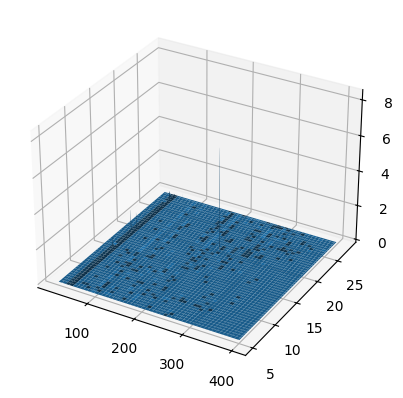

In [9]:
PATH = "C:/Users/level/OneDrive - ZHAW/Masterarbeit/mzML/001_A1_1_OOO.mzML"
import master_function as mf
import matplotlib as plt
Chromatogram , mz, rt = mf.mzml_to_array(PATH)

# 3D Plot of the Chromatogram mz und rt as x and y axis
# z axis (intensity) is Chromatogram array



In [ ]:


PATH = "C:/Users/level/OneDrive - ZHAW/Masterarbeit/mzML/001_A1_1_OOO.mzML"

# mzML-Datei laden
exp = pyopenms.MSExperiment()
pyopenms.MzMLFile().load(PATH, exp)

Chromatogramm = dict()
mZ_totlist = np.arange(20, 400.1, 0.1)
#mZ_totlist = np.round(mZ_totlist, 1)

for spectrum in exp:
    if spectrum.getMSLevel() == 1:
        rt = spectrum.getRT() / 60
        mz, intensity = spectrum.get_peaks()
        mz = np.round(mz, 1)

        Full_intensity = np.zeros(len(mZ_totlist))
        bins = np.digitize(mz, mZ_totlist)
        Full_intensity[bins - 1] = intensity

        Chromatogramm[rt] = Full_intensity

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Erstellen Sie Listen für die x, y und z Koordinaten
x = []
y = []

for retention_time, intensities in Chromatogramm.items():
    x.append(retention_time)
    y.append(sum(intensities))
    

# Konvertieren Sie die Listen in numpy Arrays
x = np.array(x)
y = np.array(y)


# Erstellen Sie eine neue Figur
fig = plt.figure()

# Fügen Sie eine neue Achse hinzu
ax = fig.add_subplot(111)
ax.plot(x, y, 'r-')
ax.set_xlabel('Retention Time (min)')
ax.set_ylabel('Total Ion Current') 
plt.show()


In [ ]:
import master_function as mf
import numpy as np


#PATH = "C:/Users/level/OneDrive - ZHAW/Masterarbeit/mzML/001_A1_1_OOO.mzML"
PATH = "F:/Documents/MasterArbeit/Data/_mzML/001_A1_1_OOO.mzML"
Chrom_000 = mf.mzml_to_dict(PATH)


Peaks_000= mf.extract_peaks(Chrom_000, 2e6)




In [ ]:
import matplotlib.pyplot as plt
spectra = list(Peaks_000.values())[0]
mZ_totlist = np.arange(20, 400.1, 0.1)
# Plotte das Spektrum als Balkendiagramm
plt.stem(mZ_totlist, spectra, markerfmt=' ',basefmt=' ')


plt.show()

In [ ]:
print(list(Peaks_000.values())[0])
print(mZ_totlist)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'Peaks_000' is your dictionary
keys = list(Peaks_000.keys())
values = list(Peaks_000.values())
mZ_totlist = np.arange(20, 400.1, 0.1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(keys)):
    _x = np.array([keys[i]] * len(mZ_totlist))
    _y = mZ_totlist
    _z = np.zeros(len(mZ_totlist))
    dx = np.ones(len(mZ_totlist))
    dy = np.ones(len(mZ_totlist))
    dz = values[i]
    ax.bar3d(_x, _y, _z, dx, dy, dz, color='b')

ax.set_xlabel('Retention Time')
ax.set_ylabel('m/z')
ax.set_zlabel('Intensity')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'Peaks_000' is your dictionary
keys = list(Chrom_000.keys())
values = list(Chrom_000.values())
mZ_totlist = np.arange(20, 400.1, 0.1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(keys)):
    _x = np.array([keys[i]] * len(mZ_totlist))
    _y = mZ_totlist
    _z = np.zeros(len(mZ_totlist))
    dx = np.ones(len(mZ_totlist))
    dy = np.ones(len(mZ_totlist))
    dz = values[i]
    ax.bar3d(_x, _y, _z, dx, dy, dz, color='b')

ax.set_xlabel('Retention Time')
ax.set_ylabel('m/z')
ax.set_zlabel('Intensity')
plt.show()

In [ ]:
import master_function as ms

MSDIAL = "F:/Program Files/MSDIAL/MsdialConsoleApp.exe"
MZML = "F:/Documents/MasterArbeit/Data/_mzml"
OUT = "F:/Documents/MasterArbeit"
PARAM = "F:/Documents/MasterArbeit/Data/_mzml/GCMS_MSDIAL_param.txt"

ms.interact_with_msdial(MZML,OUT,MSDIAL,PARAM)

'''
F:\Program Files\MSDIAL>MsdialConsoleApp.exe

Msdial Console App requires the following args:
MsdialConsoleApp.exe <analysisType> -i <input folder> -o <output folder> -m <method file> -p (option)
    Where: <analysisType>       is one of gcms, lcmsdda, lcmsdia, lcimmsdda, lcimmsdia  (required)
           <input folder>       is the folder containing the files to be processed      (required)
           <output folder>      is the folder to save results   (required)
           <method file>        is a file holding processing properties (required)
           <option -p>           is an option to generate MTB file to be loaded in MSDIAL GUI application.
           <option -mCE>    is an option to select multi collision energies mode

F:\Program Files\MSDIAL>
'''


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'Peaks_000' is your dictionary
keys = Chrom_000.keys()
values = Chrom_000.values()
mZ_totlist = np.arange(20, 400.1, 0.1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for key, value in zip(keys, values):
    ax.bar3d(np.array([key] * len(mZ_totlist)), mZ_totlist, np.zeros(len(mZ_totlist)), 
             np.ones(len(mZ_totlist)), np.ones(len(mZ_totlist)), value, color='b')

ax.set_xlabel('Retention Time')
ax.set_ylabel('m/z')
ax.set_zlabel('Intensity')
plt.show()

In [ ]:
import pandas as pd
import os

def convert_msdial_to_csv(folder_path):
    # Liste aller Dateien im Ordner
    files = os.listdir(folder_path)

    # Filtere nur .msdial Dateien
    msdial_files = [file for file in files if file.endswith('.msdial')]

    for file in msdial_files:
        # Lese die .msdial Datei
        data = pd.read_csv(os.path.join(folder_path, file), sep='\t')

        # Erstelle den Namen der .csv Datei
        csv_file_name = file.replace('.msdial', '.csv')

        # Speichere die Daten als .csv
        data.to_csv(os.path.join(folder_path, csv_file_name), index=False)

    print(f'Converted {len(msdial_files)} .msdial files to .csv')


In [ ]:
convert_msdial_to_csv('F:/Documents/MasterArbeit/MSDIAL')

In [1]:
import master_function as mf

DATA_PATH = 'F:/Documents/MasterArbeit/OOO_test'

#mf.convert_all_d_to_mzml(DATA_PATH)

MSDIAL_PATH = "F:/Program Files/MSDIAL/MsdialConsoleApp.exe"

mf.interact_with_msdial(DATA_PATH,MSDIAL_PATH,'GCMS_MSDIAL_param')

mf.convert_msdial_to_csv(DATA_PATH)



Converted 0 .msdial files to .csv


In [3]:
import numpy as np
from scipy.optimize import least_squares

def taylor_2d(params, x, y, z):
    a, b, c, d, e, f = params
    return a + b*x + c*y + d*x**2 + e*y**2 + f*x*y - z

def fit_taylor_2d(x, y, z):
    initial_guess = [1, 1, 1, 1, 1, 1]
    res = least_squares(taylor_2d, initial_guess, args=(x, y, z))
    return res.x

# Beispiel
x = np.random.rand(100)
y = np.random.rand(100)
z = 3 + 2*x + 3*y + 1.5*x**2 + 2.5*y**2 + 1.2*x*y

params = fit_taylor_2d(x, y, z)
print(params)

[3.  2.  3.  1.5 2.5 1.2]


In [25]:
from pyteomics import mgf

def parse_msp_file(file_path):
    with open(file_path, 'r') as file:
        compound_list = {}
        spectra = []
        Flag = False
        for line in file:
            line = line.strip()
            if not line:
                Flag = False
                compound_list[name] = spectra
                spectra = []
            elif line.startswith("Name:"):
                name = line.split(": ", 1)[1]
            elif line.startswith("Num Peaks:"):
                Flag = True    
            elif Flag:
                splited = line.split(";")
                for i in splited:
                    if i == "":
                        continue
                    mz_int_pair =[float(x) for x in i.split()]
                    spectra.append(mz_int_pair)            
    return compound_list

# Example usage:
file_path = 'F:/Downloads/Tenax_Decomposition.msp'
spectra = parse_msp_file(file_path)

# Print out the first spectrum to see its contents


['14 1', ' 15 12', ' 26 28', ' 27 332', ' 28 72', '']
[14.0, 1.0]
[15.0, 12.0]
[26.0, 28.0]
[27.0, 332.0]
[28.0, 72.0]
['29 442', ' 30 12', ' 31 16', ' 37 6', ' 38 23', '']
[29.0, 442.0]
[30.0, 12.0]
[31.0, 16.0]
[37.0, 6.0]
[38.0, 23.0]
['39 392', ' 40 59', ' 41 899', ' 42 514', ' 43 836', '']
[39.0, 392.0]
[40.0, 59.0]
[41.0, 899.0]
[42.0, 514.0]
[43.0, 836.0]
['44 883', ' 45 208', ' 46 5', ' 49 1', ' 50 21', '']
[44.0, 883.0]
[45.0, 208.0]
[46.0, 5.0]
[49.0, 1.0]
[50.0, 21.0]
['51 36', ' 52 13', ' 53 84', ' 54 93', ' 55 779', '']
[51.0, 36.0]
[52.0, 13.0]
[53.0, 84.0]
[54.0, 93.0]
[55.0, 779.0]
['56 92', ' 57 625', ' 58 71', ' 59 6', ' 61 1', '']
[56.0, 92.0]
[57.0, 625.0]
[58.0, 71.0]
[59.0, 6.0]
[61.0, 1.0]
['62 3', ' 63 6', ' 65 15', ' 66 11', ' 67 117', '']
[62.0, 3.0]
[63.0, 6.0]
[65.0, 15.0]
[66.0, 11.0]
[67.0, 117.0]
['68 204', ' 69 63', ' 70 999', ' 71 315', ' 72 113', '']
[68.0, 204.0]
[69.0, 63.0]
[70.0, 999.0]
[71.0, 315.0]
[72.0, 113.0]
['73 6', ' 74 1', ' 77 5', ' 78 1'

In [26]:
print(spectra)

{'Heptanal': [[14.0, 1.0], [15.0, 12.0], [26.0, 28.0], [27.0, 332.0], [28.0, 72.0], [29.0, 442.0], [30.0, 12.0], [31.0, 16.0], [37.0, 6.0], [38.0, 23.0], [39.0, 392.0], [40.0, 59.0], [41.0, 899.0], [42.0, 514.0], [43.0, 836.0], [44.0, 883.0], [45.0, 208.0], [46.0, 5.0], [49.0, 1.0], [50.0, 21.0], [51.0, 36.0], [52.0, 13.0], [53.0, 84.0], [54.0, 93.0], [55.0, 779.0], [56.0, 92.0], [57.0, 625.0], [58.0, 71.0], [59.0, 6.0], [61.0, 1.0], [62.0, 3.0], [63.0, 6.0], [65.0, 15.0], [66.0, 11.0], [67.0, 117.0], [68.0, 204.0], [69.0, 63.0], [70.0, 999.0], [71.0, 315.0], [72.0, 113.0], [73.0, 6.0], [74.0, 1.0], [77.0, 5.0], [78.0, 1.0], [79.0, 14.0], [80.0, 2.0], [81.0, 307.0], [82.0, 19.0], [83.0, 11.0], [84.0, 3.0], [85.0, 45.0], [86.0, 196.0], [87.0, 10.0], [91.0, 1.0], [93.0, 1.0], [95.0, 23.0], [96.0, 159.0], [97.0, 15.0], [99.0, 4.0], [113.0, 3.0], [114.0, 10.0], [115.0, 1.0]], 'Octanal': [[14.0, 4.0], [15.0, 24.0], [16.0, 1.0], [18.0, 2.0], [26.0, 19.0], [27.0, 323.0], [28.0, 74.0], [29.0, 

In [1]:
import master_function as mf
import master_class as mc

Data = mc.Data_Preparation("F:/Documents/MasterArbeit/Data")
Data.convert_d_to_mzml()
Data.interact_with_msdial("F:/ProgramFiles/MSDIAL/MsdialConsoleApp.exe", "GCMS")

Data.convert_msdial_to_csv()

Converted 0 .msdial files to .csv


In [6]:
import os 
os.listdir("F:/Documents/MasterArbeit/MSDIAL")

['001_A1_1_OOO.csv',
 '001_A1_1_OOO.msdial',
 '002_A1_2_SOO.csv',
 '002_A1_2_SOO.msdial',
 '003_A1_3_SGO.csv',
 '003_A1_3_SGO.msdial',
 '004_A1_4_SOL.csv',
 '004_A1_4_SOL.msdial',
 '005_A1_5_SGL.csv',
 '005_A1_5_SGL.msdial',
 '006_A1_6_SGL.csv',
 '006_A1_6_SGL.msdial',
 '007_A1_0_FFF.csv',
 '007_A1_0_FFF.msdial',
 '008_A1_1_OOO.csv',
 '008_A1_1_OOO.msdial',
 '009_A1_2_SOO.csv',
 '009_A1_2_SOO.msdial',
 '010_A1_3_SGO.csv',
 '010_A1_3_SGO.msdial',
 '011_A1_4_SOL.csv',
 '011_A1_4_SOL.msdial',
 '012_A1_5_SGL.csv',
 '012_A1_5_SGL.msdial',
 '013_A1_6_SGL.csv',
 '013_A1_6_SGL.msdial',
 '014_A1_0_FFF.csv',
 '014_A1_0_FFF.msdial',
 '015_A1_1_OOO.csv',
 '015_A1_1_OOO.msdial',
 '016_A1_2_SOO.csv',
 '016_A1_2_SOO.msdial',
 '017_A1_3_SGO.csv',
 '017_A1_3_SGO.msdial',
 '018_A1_4_SOL.csv',
 '018_A1_4_SOL.msdial',
 '019_A1_5_SGL.csv',
 '019_A1_5_SGL.msdial',
 '020_A1_6_SGL.csv',
 '020_A1_6_SGL.msdial',
 '021_A1_0_FFF.csv',
 '021_A1_0_FFF.msdial',
 '022_A1_1_OOO.csv',
 '022_A1_1_OOO.msdial',
 '023_A1_2

In [40]:
import os
import pandas as pd
import numpy as np

spectra_from_csv = {}
for i in os.listdir("F:/Documents/MasterArbeit/MSDIAL"):
    
    if i.endswith(".csv"):
        rt_spectra = []
        csv_file = pd.read_csv("F:/Documents/MasterArbeit/MSDIAL/"+i)
        for rt,spectra in zip(csv_file['RT(min)'],csv_file['Spectrum']):
            array = [[np.round(float(j),1) for j in i] for i in [i.split(':') for i in spectra.split()]]
            rt_spectra.append([rt, array])
        spectra_from_csv[i] = rt_spectra
    
        break

In [65]:
print(list(spectra_from_csv.values())[0][0][1])

[[21.5, 42.0], [24.1, 33.0], [25.1, 0.0], [28.1, 1.0], [32.1, 0.0], [33.0, 0.0], [33.8, 6.0], [38.0, 1.0], [39.1, 182.0], [40.0, 0.0], [41.1, 0.0], [44.1, 204.0], [47.0, 72.0], [48.0, 2.0], [50.9, 31.0], [53.1, 79.0], [54.0, 45.0], [55.0, 217.0], [58.0, 180.0], [59.0, 1350.0], [60.0, 154.0], [61.0, 531.0], [61.8, 15.0], [62.9, 48.0], [64.9, 14.0], [67.1, 116.0], [68.0, 20.0], [69.1, 58.0], [70.1, 67.0], [73.1, 6712.0], [74.0, 878.0], [75.0, 1455.0], [76.1, 83.0], [76.9, 11.0], [78.9, 58.0], [80.0, 15.0], [81.0, 303.0], [82.1, 434.0], [83.0, 231.0], [83.9, 366.0], [85.0, 212.0], [85.9, 91.0], [87.0, 270.0], [88.0, 261.0], [88.9, 861.0], [90.0, 73.0], [91.1, 71.0], [93.1, 27.0], [94.0, 10.0], [95.0, 121.0], [96.0, 859.0], [97.0, 496.0], [99.1, 20.0], [99.9, 27.0], [101.0, 145.0], [102.0, 193.0], [103.0, 1582.0], [103.9, 583.0], [104.9, 463.0], [105.9, 75.0], [106.9, 27.0], [108.2, 19.0], [108.8, 39.0], [110.0, 513.0], [111.0, 459.0], [112.1, 205.0], [113.0, 141.0], [113.0, 141.0], [113.8

In [2]:
Data.get_list_of_chromatograms('022_A1_1_OOO.mzML')

RuntimeError: the file 'F:/Documents/MasterArbeit/Data/mzml0' could not be found